In [397]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Reading & Processing 

In [398]:
stores_data = pd.read_csv('customer_shopping_data.csv')
stores_data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [399]:
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [400]:
print(stores_data.columns)
stores_data.describe()

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')


,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [401]:
unique_invoices = len(stores_data['invoice_no'].unique())
print("Total Unique invoices :",unique_invoices)

Total Unique invoices : 99457


In [402]:
unique_customers = len(stores_data['customer_id'].unique())
print("Total Unique Customers :",unique_customers)

Total Unique Customers : 99457


# 2. Product Sales & Performance based on Category 

In [403]:
product_category = stores_data.category.value_counts().reset_index()
product_category

,category,count
0,Clothing,34487
1,Cosmetics,15097
2,Food & Beverage,14776
3,Toys,10087
4,Shoes,10034
5,Souvenir,4999
6,Technology,4996
7,Books,4981


In [404]:
categorical_data = stores_data.groupby('category').agg(
    quantity_sum = ('quantity','sum'),
    price_sum = ('price','sum'),
    category_count = ('category','count')
)
categorical_data

,quantity_sum,price_sum,category_count
category,,,
Books,14982,226977.30,4981
Clothing,103558,31075684.64,34487
Cosmetics,45465,1848606.90,15097
Food & Beverage,44277,231568.71,14776
Shoes,30217,18135336.89,10034
Souvenir,14871,174436.83,4999
Technology,15021,15772050.00,4996
Toys,30321,1086704.64,10087


 Best Selling Products 

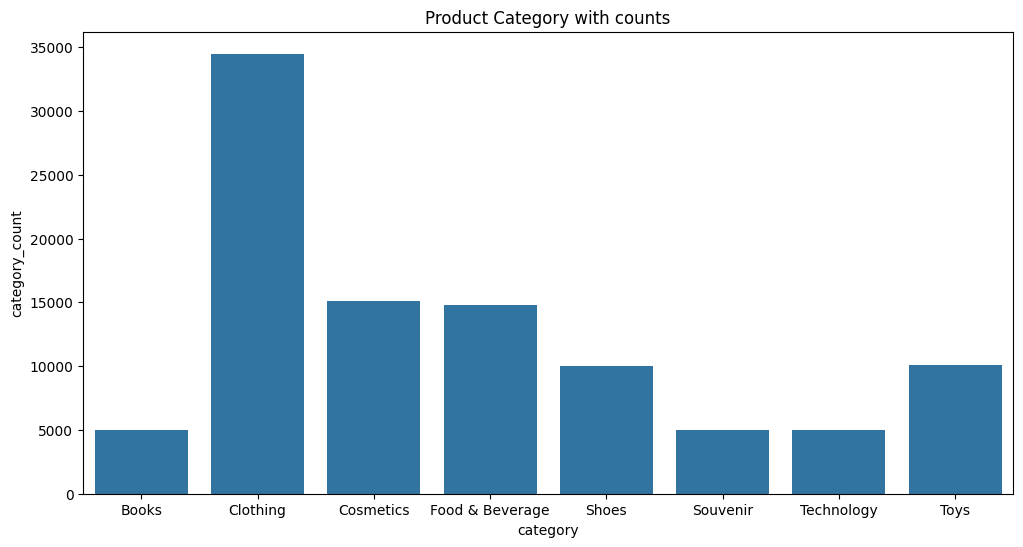

In [405]:
plt.figure(figsize=(12,6))
plt.title('Product Category with counts')
sns.barplot(x=categorical_data.index ,y=categorical_data['category_count'])
plt.show()

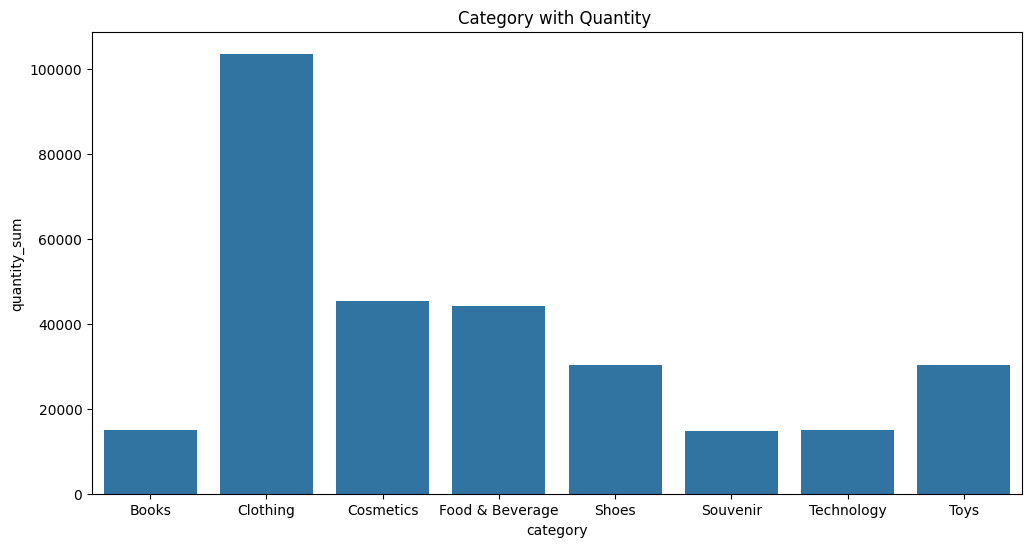

In [406]:
plt.figure(figsize=(12,6))
plt.title('Category with Quantity ')
sns.barplot(x=categorical_data.index ,y=categorical_data['quantity_sum'])
plt.show()

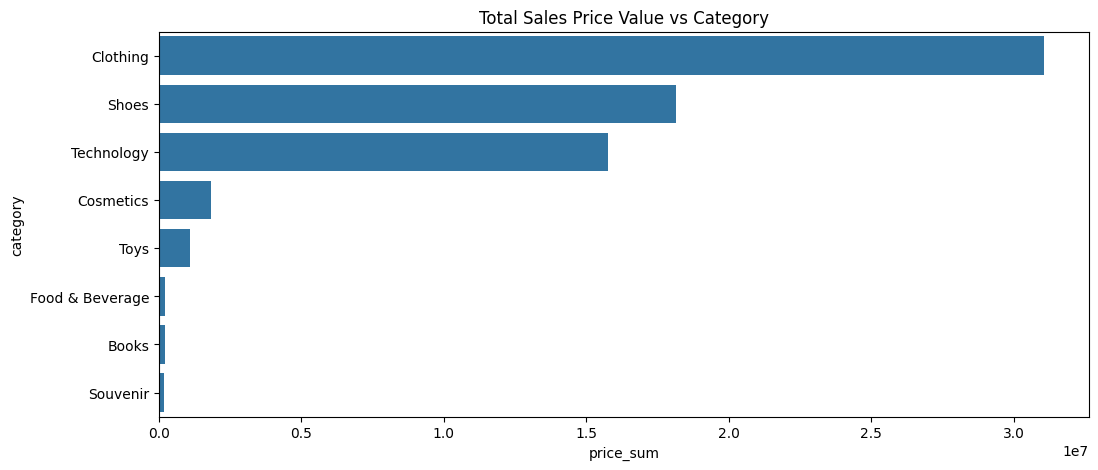

In [407]:
plt.figure(figsize=(12,5))
plt.title('Total Sales Price Value vs Category')
categorical_data = categorical_data.sort_values(by='price_sum',ascending=False)
sns.barplot(x=categorical_data['price_sum'] ,y=categorical_data.index, orient='h')
plt.show()

In [408]:
# Conclusions:
# 1. There are total 8 product categories 
# 2. Clothing is the most selling product category followed by Shoes and Technology 
# 3. Clothing category adding the highest revenue and sales 

# 3. Customer Segmentation 

In [409]:
# Customer demographics 
# 1. Gender 
# 2. Age 
# 3. Location

In [410]:
stores_data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


# 3.1 Gender 

In [411]:
customer_data = stores_data.groupby(['gender']).agg(
            invoice_count = ('invoice_no','count'),
            sales_amount = ('price','sum'),
            category_count = ('category','unique'),
            location = ('shopping_mall','unique')
            
)
customer_data

,invoice_count,sales_amount,category_count,location
gender,,,,
Female,59482,40931801.62,"[Clothing, Shoes, Books, Cosmetics, Food & Bev...","[Kanyon, Metropol AVM, Forum Istanbul, Istinye..."
Male,39975,27619564.29,"[Shoes, Clothing, Books, Toys, Technology, Cos...","[Forum Istanbul, Metrocity, Cevahir AVM, Viapo..."


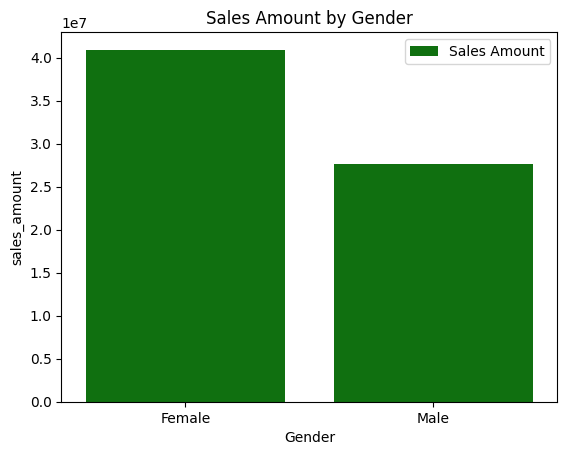

In [412]:
import matplotlib.ticker as ticker

# Plot the sales_amount (second bar, with an offset)
sns.barplot(x=customer_data.index, y=customer_data['sales_amount'], color='green', label='Sales Amount')



# Add a legend to distinguish the bars
plt.legend()

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('sales_amount')
plt.title('Sales Amount by Gender')

# Show the plot
plt.show()


<Axes: title={'center': 'Category count based on Gender'}, xlabel='category', ylabel='count'>

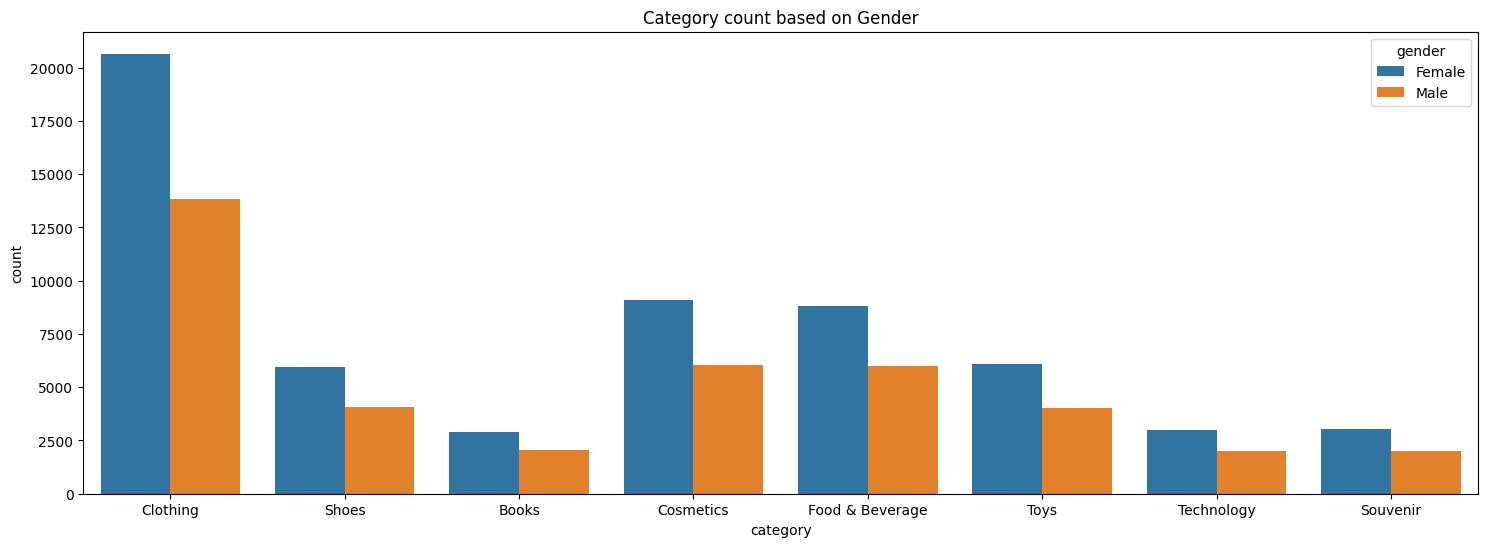

In [413]:
plt.figure(figsize=(18,6))
plt.title('Category count based on Gender')
sns.countplot(stores_data, x= stores_data['category'], hue=stores_data['gender'])

<Axes: xlabel='gender', ylabel='invoice_count'>

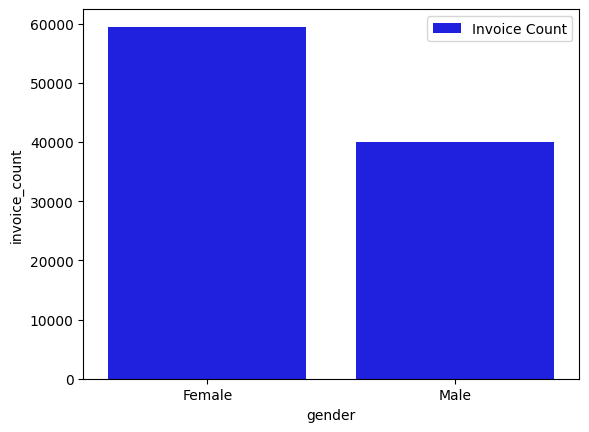

In [414]:
sns.barplot(x=customer_data.index, y=customer_data['invoice_count'], color='blue', label='Invoice Count')


# 3.2 Age Groups 

In [415]:
def classify_age_group(x):
    if x<=5: return 'kid'
    elif x>5 and x<18: return 'teenager'
    elif x>=18 and x <=30: return 'young'
    elif x>30 and x<=55: return 'adult'
    else: return 'old'

In [416]:
stores_data['age_group'] = stores_data['age'].apply(classify_age_group)
customer_category_data = stores_data
customer_category_data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_group
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,young
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,young
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,young
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,old
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,adult
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,adult
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,young
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,old
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,old


In [417]:
# Analyse product sales based on age groups 

age_groups = customer_category_data.age_group.value_counts()
age_groups

age_group
adult    47846
old      26587
young    25024
Name: count, dtype: int64

/var/folders/yn/3hhy0_3d3w7bfpvchs0d2c440000gn/T/ipykernel_44476/760456488.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(age_groups, palette=['#FF5733', '#33FF57', '#3357FF'] )


<Axes: xlabel='age_group', ylabel='count'>

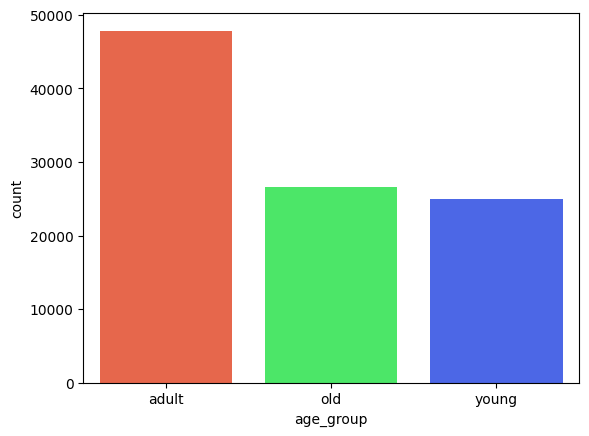

In [418]:
sns.barplot(age_groups, palette=['#FF5733', '#33FF57', '#3357FF'] )

Text(0.5, 1.0, 'Age groups %')

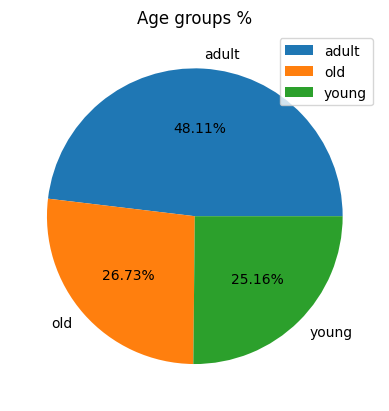

In [419]:
plt.pie(age_groups , labels=age_groups.index, autopct='%1.2F%%')
plt.legend()
plt.title('Age groups %')

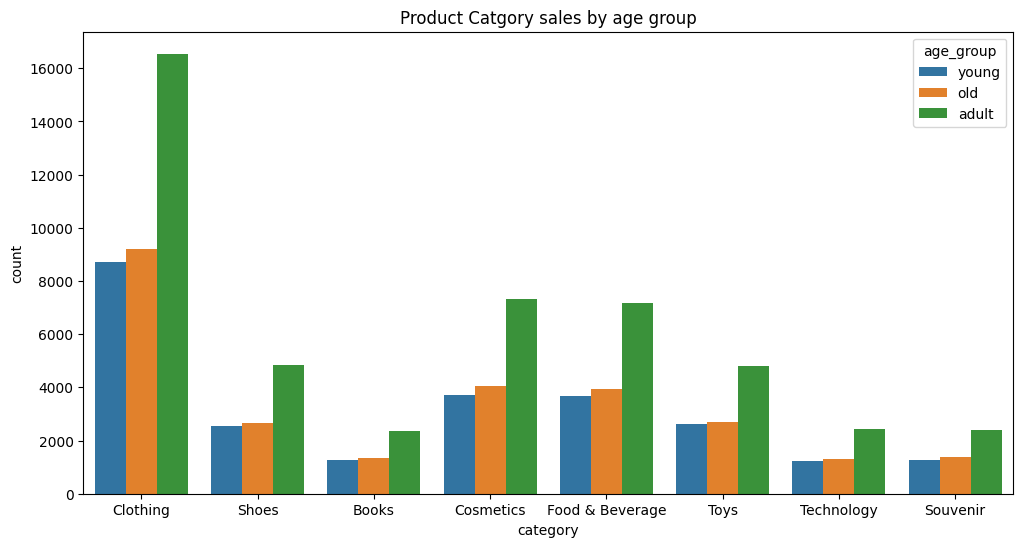

In [420]:
# Age group with different product category 
plt.figure(figsize=(12,6))
plt.title('Product Catgory sales by age group')
sns.countplot(customer_category_data, x=customer_category_data['category'], hue=customer_category_data['age_group'])
plt.show()


# 3.3 Sales by locations 

In [421]:
sales_locations = stores_data.shopping_mall.value_counts()
sales_locations

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64

<Axes: title={'center': 'Location wise sales count'}, xlabel='count', ylabel='shopping_mall'>

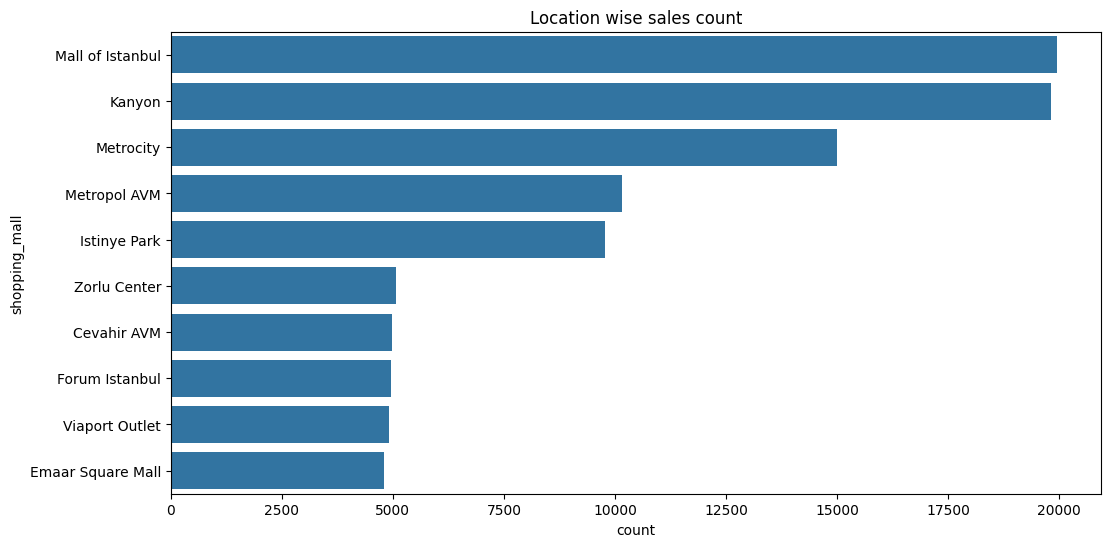

In [422]:
plt.figure(figsize=(12,6))
plt.title('Location wise sales count')
sns.barplot(sales_locations,orient='h')

In [423]:
# Conclusion :
# 1. Female contribution to revenue/sales is higher than men 
# 2. Adult age group(31-55) people purchase most
# 3. Mall of Istanbul and Kanyon are the most/best selling locations

# 4 . Sales Trend & Forecast

In [424]:
stores_data.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall',
       'age_group'],
      dtype='object')

In [425]:
sales_data = stores_data[['invoice_date','quantity','price']].sort_values(by='invoice_date').reset_index(drop=True)
sales_data['invoice_date'] = pd.to_datetime(sales_data['invoice_date'],format="%d/%m/%Y")
sales_data = sales_data.groupby('invoice_date').agg('sum')

sales_data

,quantity,price
invoice_date,,
2021-01-01,333,71524.88
2021-01-02,387,85257.90
2021-01-03,405,102892.65
2021-01-04,379,75425.08
2021-01-05,374,85855.16
...,...,...
2023-03-04,435,108199.45
2023-03-05,354,82844.41
2023-03-06,401,111230.13


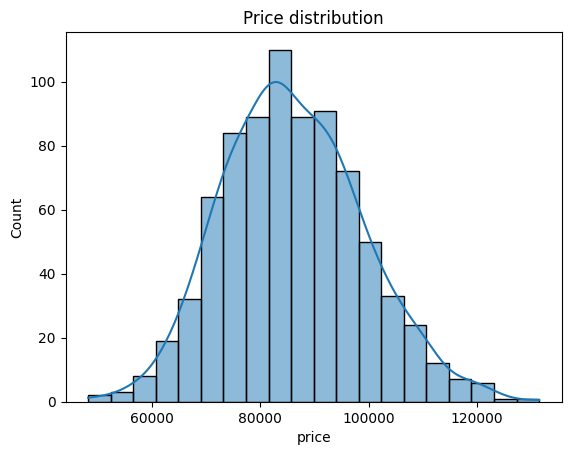

Text(0.5, 1.0, 'Quantity Distribution')

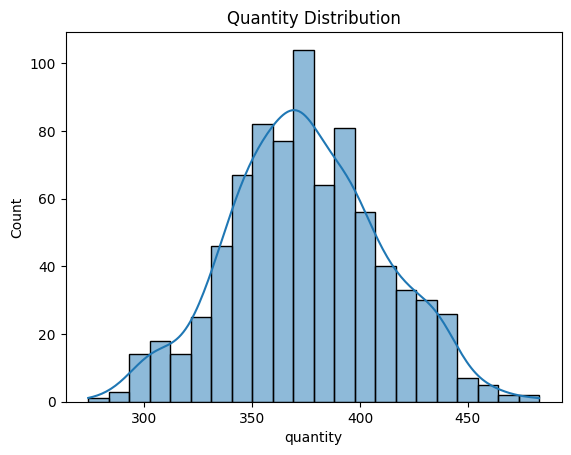

In [426]:
# sales_data['quantity'].hist()
sns.histplot(sales_data['price'],bins=20, kde=True)
plt.title('Price distribution')
plt.show()
sns.histplot(sales_data['quantity'],kde=True)
plt.title('Quantity Distribution')

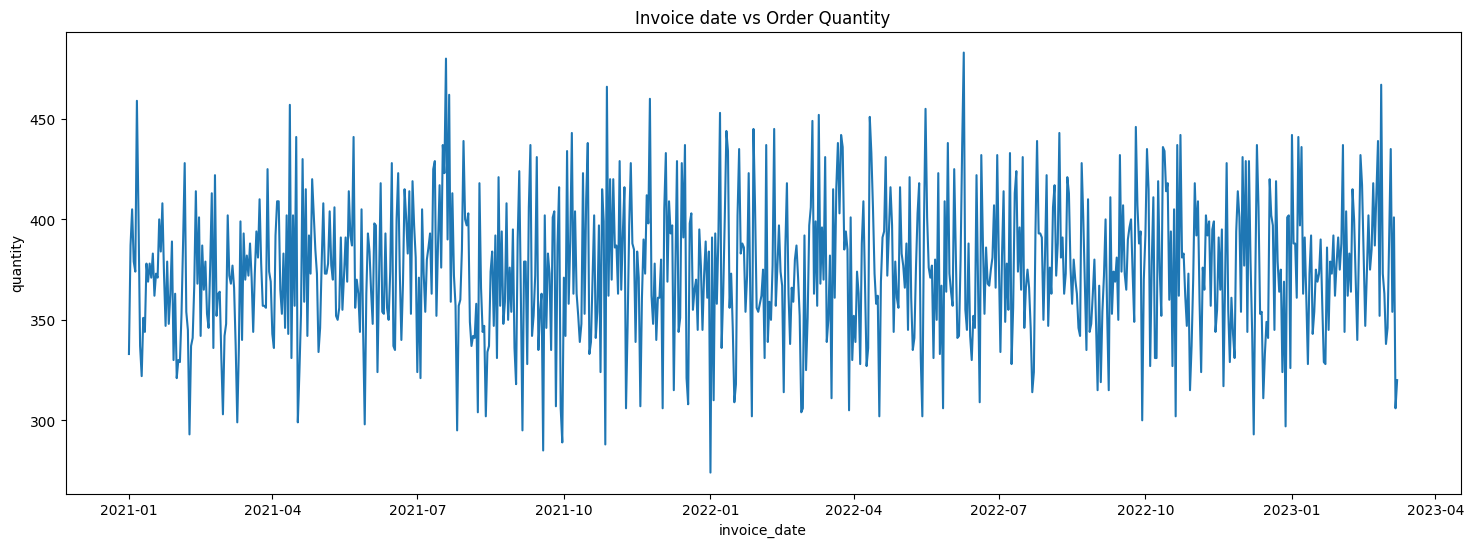

In [439]:
plt.figure(figsize=(18,6))
sns.lineplot(x=sales_data.index, y=sales_data['quantity'])
plt.title('Invoice date vs Order Quantity')
plt.show()

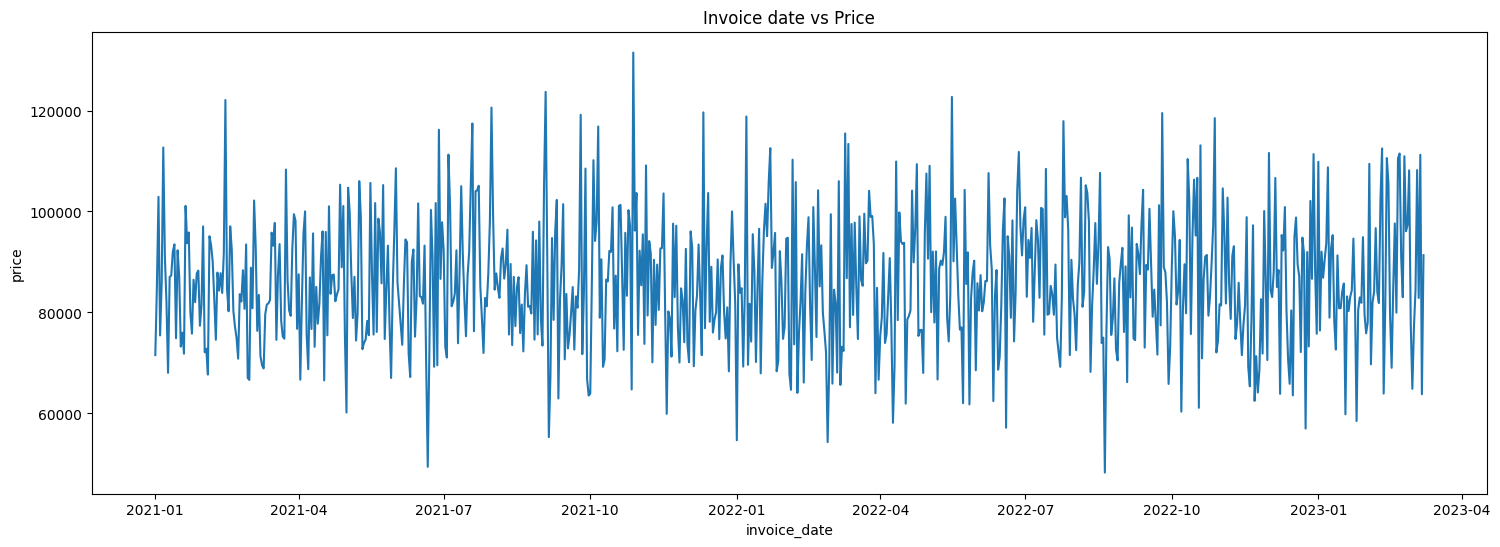

In [443]:
plt.figure(figsize=(18,6))
sns.lineplot(x=sales_data.index, y=sales_data['price'])
plt.title('Invoice date vs Price')
plt.show()